This project is to demonstrate the retrievability of information from Knowledge Graph (KG). The KG is created for risk management in the field of Artificial Intelligence, limited to the context of chatbot application. Prior to commencement of the Python code, the following Cypher codes are executed in Neo4j Desktop to generate the required nodes and relationships which essentially answered question 1:-


//Create the node for context
MERGE (chatbot: Context {Sector:'Judiciary', Model:'LLM', Application:'Legal Advice Chatbot'})

// Create the nodes for risk type (16 Nodes)
MERGE (harm: Risk {Name:'Harmful content', LC_Phase:'Deployment'})
MERGE (hallucination: Risk {Name:'Inaccurate information', LC_Phase:'Deployment'})
MERGE (output_inappr: Risk {Name:'Inappropriate content', LC_Phase:'Deployment'})
MERGE (data_leakage: Risk {Name:'Data leakage', LC_Phase:'Deployment'})
MERGE (swv: Risk {Name:'Software vulnerabilities', LC_Phase:'Deployment'})
MERGE (hwo: Risk {Name:'Hardware overload', LC_Phase:'Plan and Design'})
MERGE (facterr: Risk {Name:'Injection of factual errors', LC_Phase:'Plan and Design'})
MERGE (tokenlimit: Risk {Name:'Token limit', LC_Phase:'Plan and Design'})
MERGE (extattack: Risk {Name:'Extraction attack', LC_Phase:'Deployment'})
MERGE (evsattack: Risk {Name:'Evasion attack', LC_Phase:'Modelling'})
MERGE (psnattack: Risk {Name:'Poisoning attack', LC_Phase:'Data preparation'})
MERGE (ovhattack: Risk {Name:'Overhead attack', LC_Phase:'Deployment'})
MERGE (infattack: Risk {Name:'Inference attack', LC_Phase:'Deployment'})
MERGE (nsfw: Risk {Name:'Not-suitable-for-work prompts', LC_Phase:'Deployment'})
MERGE (advprompts: Risk {Name:'Adversarial prompts', LC_Phase:'Deployment'})
MERGE (datadrift: Risk {Name:'Data drift', LC_Phase:'Maintenance'})

// Create a list of the nodes
WITH [harm, hallucination, output_inappr, data_leakage, swv, hwo, facterr, tokenlimit, extattack, evsattack, psnattack, ovhattack, infattack, nsfw, advprompts, datadrift] AS risks, chatbot

// Loop through the list and create the relationships with the Context node
FOREACH (risk IN risks | 
  MERGE (risk)-[:AFFECT {Impact:'moderate', Probability:'moderate'}]->(chatbot)
)

// declare stakeholders used in the graph
MERGE (development:Stakeholder {Name:"Development team"})
MERGE (infrastructure:Stakeholder {Name:"Infrastructure provider"})
MERGE (management:Stakeholder {Name:"Management team"})
MERGE (data:Stakeholder {Name:"Data provider"})
MERGE (operation:Stakeholder {Name:"Operation team"})


// linking treatment to harmful content 
MERGE (harm: Risk {Name:'Harmful content', LC_Phase:'Deployment'})
MERGE (detection: Treatment {Name:'Detection', LC_Phase:'Deployment'}) 
MERGE (detection)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(harm)
MERGE (development)-[:RESPONSIBLE_FOR]->(detection) 
MERGE (intervention: Treatment {Name:'Intervention', LC_Phase:'Deployment'})
MERGE (intervention)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(harm)
MERGE (development)-[:RESPONSIBLE_FOR]->(intervention)

// linking treatment to Inaccurate information
MERGE (hallucination: Risk {Name:'Inaccurate information', LC_Phase:'Deployment'})
MERGE (mtai: Treatment {Name:'Multi-agent interaction', LC_Phase:'Deployment'})
MERGE (mtai)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hallucination)
MERGE (development)-[:RESPONSIBLE_FOR]->(mtai)
MERGE (detection)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hallucination)
MERGE (extkl: Treatment {Name:'Exploiting external knowledge', LC_Phase:'Plan and Design'})
MERGE (extkl)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hallucination)
MERGE (development)-[:RESPONSIBLE_FOR]->(extkl) 
MERGE (rlhf: Treatment {Name:'Learning from human feedback', LC_Phase:'Deployment'})
MERGE (rlhf)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hallucination)
MERGE (development)-[:RESPONSIBLE_FOR]->(rlhf)  
MERGE (rerank: Treatment {Name:'Reranking strategy', LC_Phase:'Plan and Design'})
MERGE (rerank)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hallucination)
MERGE (development)-[:RESPONSIBLE_FOR]->(rerank) 
MERGE (decoding: Treatment {Name:'Improving decoding strategies', LC_Phase:'Modelling'})
MERGE (decoding)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hallucination)
MERGE (infrastructure)-[:RESPONSIBLE_FOR]->(decoding)

// linking treatment to Inappropriate content
MERGE (output_inappr: Risk {Name:'Inappropriate content', LC_Phase:'Deployment'})
MERGE (guardrails: Treatment {Name:'Guardrails', LC_Phase:'Data preparation'})
MERGE (guardrails)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(output_inappr)
MERGE (development)-[:RESPONSIBLE_FOR]->(guardrails) 

// linking treatment to Injection of factual errors
MERGE (facterr: Risk {Name:'Injection of factual errors', LC_Phase:'Plan and Design'})
MERGE (safety_pp: Treatment {Name:'Safety pre-prompt', LC_Phase:'Plan and Design'})
MERGE (safety_pp)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(facterr)
MERGE (management)-[:RESPONSIBLE_FOR]->(safety_pp)

// linking treatment to Evasion attack
MERGE (evsattack: Risk {Name:'Evasion attack', LC_Phase:'Modelling'})
MERGE (safety_pp)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(evsattack)

// linking treatment to Poisoning attack
MERGE (psnattack: Risk {Name:'Poisoning attack', LC_Phase:'Data preparation'})
MERGE (clean_trn_data: Treatment {Name:'Cleaning training data', LC_Phase:'Data preparation'})
MERGE (clean_trn_data)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(psnattack)
MERGE (data)-[:RESPONSIBLE_FOR]->(clean_trn_data)
MERGE (safety_pp)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(psnattack)

// linking treatment to Data leakage
MERGE (data_leakage: Risk {Name:'Data leakage', LC_Phase:'Deployment'})
MERGE (data_min: Treatment {Name:'Data minimization', LC_Phase:'Data preparation'})
MERGE (data_min)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(data_leakage)
MERGE (data)-[:RESPONSIBLE_FOR]->(data_min)
MERGE (data_any: Treatment {Name:'Data anonymization', LC_Phase:'Data preparation'})
MERGE (data_any)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(data_leakage)
MERGE (data)-[:RESPONSIBLE_FOR]->(data_any)
MERGE (guardrails)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(data_leakage)

// linking treatment to Software vulnerabilities
MERGE (swv: Risk {Name:'Software vulnerabilities', LC_Phase:'Deployment'})
MERGE (cfi: Treatment {Name:'Control flow integrity', LC_Phase:'Plan and Design'})
MERGE (cfi)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(swv)
MERGE (development)-[:RESPONSIBLE_FOR]->(cfi)

// linking treatment to Hardware overload
MERGE (hwo: Risk {Name:'Hardware overload', LC_Phase:'Plan and Design'})
MERGE (mon_util: Treatment {Name:'Monitoring of utilization', LC_Phase:'Maintain'})
MERGE (mon_util)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hwo)
MERGE (operation)-[:RESPONSIBLE_FOR]->(mon_util)
MERGE (hwec: Treatment {Name:'Hardware error correction', LC_Phase:'Deployment'})
MERGE (hwec)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(hwo)
MERGE (operation)-[:RESPONSIBLE_FOR]->(hwec)

// linking treatment to Token limit
MERGE (tokenlimit: Risk {Name:'Token limit', LC_Phase:'Plan and Design'})
MERGE (local_models: Treatment {Name:'Use local models', LC_Phase:'Plan and Design'})
MERGE (local_models)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(tokenlimit)
MERGE (development)-[:RESPONSIBLE_FOR]->(local_models)

// linking treatment to Extraction attack
MERGE (extattack: Risk {Name:'Extraction attack', LC_Phase:'Deployment'})
MERGE (watermarking: Treatment {Name:'Watermarking', LC_Phase:'Plan and Design'})
MERGE (watermarking)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(extattack)
MERGE (development)-[:RESPONSIBLE_FOR]->(watermarking)
MERGE (chg_in_format: Treatment {Name:'Changing input format', LC_Phase:'Plan and Design'})
MERGE (chg_in_format)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(extattack)
MERGE (development)-[:RESPONSIBLE_FOR]->(chg_in_format)

// linking treatment to Overhead attack
MERGE (ovhattack: Risk {Name:'Overhead attack', LC_Phase:'Deployment'})
MERGE (traffic_mon: Treatment {Name:'Traffic monitoring', LC_Phase:'Maintenance'})
MERGE (traffic_mon)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(ovhattack)
MERGE (operation)-[:RESPONSIBLE_FOR]->(traffic_mon)

// linking treatment to Inference attack
MERGE (infattack: Risk {Name:'Inference attack', LC_Phase:'Deployment'})
MERGE (diffpriv: Treatment {Name:'Differential privacy', LC_Phase:'Data preparation'})
MERGE (diffpriv)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(infattack)
MERGE (data)-[:RESPONSIBLE_FOR]->(diffpriv)
MERGE (advtraining: Treatment {Name:'Adversarial training', LC_Phase:'Modelling'})
MERGE (advtraining)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(infattack)
MERGE (infrastructure)-[:RESPONSIBLE_FOR]->(advtraining)
MERGE (guardrails)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(infattack)

// linking treatment to Not suitable for work prompts
MERGE (nsfw: Risk {Name:'Not-suitable-for-work prompts', LC_Phase:'Deployment'})
MERGE (guardrails)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(nsfw)

// linking treatment to Adversarial prompts
MERGE (advprompts: Risk {Name:'Adversarial prompts', LC_Phase:'Deployment'})
MERGE (guardrails)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(advprompts)
MERGE (adj_pdp: Treatment {Name:'Adjusting the order of pre-defined prompt', LC_Phase:'Plan and Design'})
MERGE (adj_pdp)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(advprompts)
MERGE (development)-[:RESPONSIBLE_FOR]->(adj_pdp)
MERGE (kw_match: Treatment {Name:'Keyword matching', LC_Phase:'Plan and Design'})
MERGE (kw_match)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(advprompts)
MERGE (development)-[:RESPONSIBLE_FOR]->(kw_match)
MERGE (ct_classify: Treatment {Name:'Content classifier', LC_Phase:'Plan and Design'})
MERGE (ct_classify)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(advprompts)
MERGE (development)-[:RESPONSIBLE_FOR]->(ct_classify)
MERGE (safety_pp)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(advprompts)

// linking treatment to Data drift
MERGE (datadrift: Risk {Name:'Data drift', LC_Phase:'Maintenance'})
MERGE (eval_metrics: Treatment {Name:'Evaluation metrics', LC_Phase:'Deployment'})
MERGE (eval_metrics)-[:MODIFIES {I_effect:'moderate', P_effect:'moderate'}]->(datadrift)
MERGE (operation)-[:RESPONSIBLE_FOR]->(eval_metrics)



In [1]:
# Importing the relevant libraries
from dotenv import load_dotenv
import os

import textwrap

# Langchain
from langchain_community.graphs import Neo4jGraph

# Warning control
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load authentication information from environment
load_dotenv('.env', override=True)
NEO4J_URI = os.getenv('NEO4J_URI')
NEO4J_USERNAME = os.getenv('NEO4J_USERNAME')
NEO4J_PASSWORD = os.getenv('NEO4J_PASSWORD')
NEO4J_DATABASE = os.getenv('NEO4J_DATABASE') or 'neo4j'

In [3]:
# Create an instance of Neo4jGraph
kg = Neo4jGraph(
    url=NEO4J_URI, username=NEO4J_USERNAME, password=NEO4J_PASSWORD, database=NEO4J_DATABASE
)

In [4]:
# Display the schema for verification
kg.refresh_schema()
print(textwrap.fill(kg.schema, 60))

Node properties are the following: Context {Sector: STRING,
Application: STRING, Model: STRING},Risk {Name: STRING,
LC_Phase: STRING},Treatment {LC_Phase: STRING, Name:
STRING},Stakeholder {Name: STRING} Relationship properties
are the following: AFFECT {Probability: STRING, Impact:
STRING},MODIFIES {P_effect: STRING, I_effect: STRING} The
relationships are the following: (:Risk)-[:AFFECT]-
>(:Context),(:Treatment)-[:MODIFIES]-
>(:Risk),(:Stakeholder)-[:RESPONSIBLE_FOR]->(:Treatment)


Research question 2 is stated as follows: 
How to prioritize the risks associated with an AI application? 

The AFFECT relationship which records the impact and probability of each risk will be used to determine the risk level and hence, prioritization can be done based on the risk level.  

In [5]:
# Generate query to Knowledge Graph involving the 'AFFECT' relationship

QUERY_RISK = kg.query("""
MATCH (n:Risk)-[r:AFFECT]->(c:Context)
RETURN n.Name AS Risk, r.Impact, r.Probability 
""")

In [6]:
# Verify the values of QUERY_RISK

QUERY_RISK

[{'Risk': 'Token limit', 'r.Impact': 'moderate', 'r.Probability': 'moderate'},
 {'Risk': 'Injection of factual errors',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Hardware overload',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Overhead attack',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Harmful content',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Inappropriate content',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Data leakage', 'r.Impact': 'moderate', 'r.Probability': 'moderate'},
 {'Risk': 'Inference attack',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Data drift', 'r.Impact': 'moderate', 'r.Probability': 'moderate'},
 {'Risk': 'Poisoning attack',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Adversarial prompts',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Evasion attack',
  'r.Impact':

In [7]:
# Modify the impact and probability for the AFFECT relationship of risk hallucination 
# to ensure the result display this as the highest risk
# in actual situation, expert opinion/stakeholder will decide the impact and probability of each risk

MODIFY_RISK = kg.query("""
MATCH (:Risk {Name:'Inaccurate information', LC_Phase:'Deployment'})-[a:AFFECT]->(chatbot: Context {Sector:'Judiciary', Model:'LLM', Application:'Legal Advice Chatbot'}) SET a.Impact = 'high', a.Probability = 'high'
""")


In [8]:
# Generate query to Knowledge Graph involving the 'AFFECT' relationship
# after changes to the relationship between Inaccrurate information and chatbot

QUERY_RISK = kg.query("""
MATCH (n:Risk)-[r:AFFECT]->(c:Context)
RETURN n.Name AS Risk, r.Impact, r.Probability 
""")

QUERY_RISK

[{'Risk': 'Token limit', 'r.Impact': 'moderate', 'r.Probability': 'moderate'},
 {'Risk': 'Injection of factual errors',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Hardware overload',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Overhead attack',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Harmful content',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Inappropriate content',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Data leakage', 'r.Impact': 'moderate', 'r.Probability': 'moderate'},
 {'Risk': 'Inference attack',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Data drift', 'r.Impact': 'moderate', 'r.Probability': 'moderate'},
 {'Risk': 'Poisoning attack',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Adversarial prompts',
  'r.Impact': 'moderate',
  'r.Probability': 'moderate'},
 {'Risk': 'Evasion attack',
  'r.Impact':

In [9]:
# First define a function called calculate risk_level 
# Then list out the calculated risk level for each risk
# Finally display the risk with highest risk level for consideration

def calculate_risk_level(impact_value, probability_value):
    risk_matrix = {
        "very high": {"very low": "very low", "low": "low", "moderate": "moderate", "high": "high", "very high": "very high"},
        "high": {"very low": "very low",  "low":  "low",  "moderate":"moderate","high":"high","very high":"very high"},
        "moderate":{"very low":" very low","low":"low","moderate":" moderate","high":" moderate"," very high ":"high"},
        'low':{" very low ":" very low ","low ":"low "," moderate ":"low "," high ":" moderate "," very high":" moderate"},
        ' very low ':{" very low ": " very low","low ":"very low","moderate":"low", "high" : "low", "very high":"low"}
    }


    try:
        risk_level = risk_matrix[impact_value][probability_value]
    except KeyError:
        print("Invalid impact or probability value.")
        return None

    return risk_level

risk_levels = {"very low": 1, "low": 2, "moderate": 3, "high": 4, "very high": 5}
highest_risk_level = "very low"
highest_risk_items = []

# Calculate risk level for each treatment-risk pair
for item in QUERY_RISK:
    risk_level = calculate_risk_level(item['r.Impact'].strip(), item['r.Probability'].strip())
    print(f"Risk level for {item['Risk']} is {risk_level}")
    # print(f"Checking risk level: {risk_level}")  # Add this line
    risk_level = risk_level.strip()
    # Check if this risk level is higher than the current highest risk level
    if risk_levels[risk_level] > risk_levels[highest_risk_level]:
        highest_risk_level = risk_level
        highest_risk_items = [item]  # Start a new list with this item
    elif risk_level == highest_risk_level:
        highest_risk_items.append(item)  # Add to the list of highest risk items

# Print out the combinations of impact and probability value that result in the highest risk level
print("\nThe following combinations of impact and probability value result in the highest risk level:")
for item in highest_risk_items:
    print(f"Risk: {item['Risk']}, Impact Value: {item['r.Impact']}, Probability Value: {item['r.Probability']}")

Risk level for Token limit is  moderate
Risk level for Injection of factual errors is  moderate
Risk level for Hardware overload is  moderate
Risk level for Overhead attack is  moderate
Risk level for Harmful content is  moderate
Risk level for Inappropriate content is  moderate
Risk level for Data leakage is  moderate
Risk level for Inference attack is  moderate
Risk level for Data drift is  moderate
Risk level for Poisoning attack is  moderate
Risk level for Adversarial prompts is  moderate
Risk level for Evasion attack is  moderate
Risk level for Extraction attack is  moderate
Risk level for Software vulnerabilities is  moderate
Risk level for Inaccurate information is high
Risk level for Not-suitable-for-work prompts is  moderate

The following combinations of impact and probability value result in the highest risk level:
Risk: Inaccurate information, Impact Value: high, Probability Value: high


Research question 3 is stated as follows: 
What is the phase in AI life cycle that register the most risks? 


The Risk node with the LC_Phase property will be used to determine the number of risks associated with each phase in the AI life cycle.

In [10]:
# Generate query to Knowledge Graph involving the 'Risk' node

QUERY_PHASE = kg.query("""
MATCH (r:Risk)
WITH r.LC_Phase AS phase, count(*) AS count
ORDER BY count DESC
MATCH (r:Risk {LC_Phase: phase})
RETURN r.Name, r.LC_Phase
""")

In [11]:
# Verify the values in QUERY_PHASE

QUERY_PHASE

[{'r.Name': 'Harmful content', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Inaccurate information', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Inappropriate content', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Data leakage', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Software vulnerabilities', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Extraction attack', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Overhead attack', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Inference attack', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Not-suitable-for-work prompts', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Adversarial prompts', 'r.LC_Phase': 'Deployment'},
 {'r.Name': 'Hardware overload', 'r.LC_Phase': 'Plan and Design'},
 {'r.Name': 'Injection of factual errors', 'r.LC_Phase': 'Plan and Design'},
 {'r.Name': 'Token limit', 'r.LC_Phase': 'Plan and Design'},
 {'r.Name': 'Evasion attack', 'r.LC_Phase': 'Modelling'},
 {'r.Name': 'Poisoning attack', 'r.LC_Phase': 'Data preparation'},
 {'r.Name': 'Data drift', 'r.L

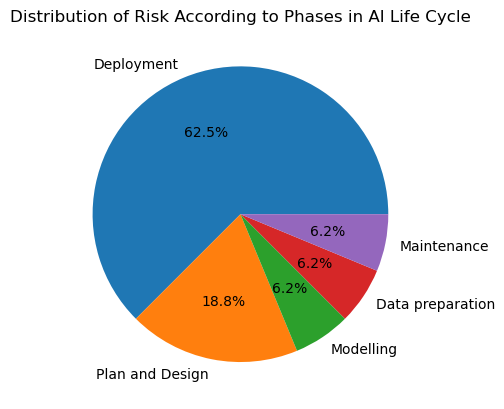

In [12]:
# Plot a pie chart to display the risk distribution
# according to the phase in AI life cycle

import matplotlib.pyplot as plt
from collections import Counter


# Count the number of each LC_Phase
phase_counts = Counter(item['r.LC_Phase'] for item in QUERY_PHASE)

# Get the phases and their counts
phases = list(phase_counts.keys())
counts = list(phase_counts.values())

# Create a pie chart
plt.pie(counts, labels=phases, autopct='%1.1f%%')
plt.title('Distribution of Risk According to Phases in AI Life Cycle')
plt.show()

Research question 4 is stated as follows: 
What is the risk treatment that could moderate the most number of risks? 

The number of times MODIFIES relationship occurs between a Treatment and Risk will be calculated

In [13]:
# Generate query to Knowledge Graph that calculates
# the number of 'MODERATE' relationship to associated risks

QUERY_TREATMENT = kg.query("""
MATCH (t:Treatment)-[:MODIFIES]->(r:Risk)
WITH t.Name AS Treatment, count(distinct r.Name) AS RiskCount
ORDER BY RiskCount DESC
RETURN Treatment, RiskCount
""")

In [14]:
# Verify the value of QUERY_TREATMENT

QUERY_TREATMENT

[{'Treatment': 'Guardrails', 'RiskCount': 5},
 {'Treatment': 'Safety pre-prompt', 'RiskCount': 4},
 {'Treatment': 'Detection', 'RiskCount': 2},
 {'Treatment': 'Intervention', 'RiskCount': 1},
 {'Treatment': 'Reranking strategy', 'RiskCount': 1},
 {'Treatment': 'Exploiting external knowledge', 'RiskCount': 1},
 {'Treatment': 'Multi-agent interaction', 'RiskCount': 1},
 {'Treatment': 'Learning from human feedback', 'RiskCount': 1},
 {'Treatment': 'Improving decoding strategies', 'RiskCount': 1},
 {'Treatment': 'Data anonymization', 'RiskCount': 1},
 {'Treatment': 'Data minimization', 'RiskCount': 1},
 {'Treatment': 'Control flow integrity', 'RiskCount': 1},
 {'Treatment': 'Hardware error correction', 'RiskCount': 1},
 {'Treatment': 'Monitoring of utilization', 'RiskCount': 1},
 {'Treatment': 'Use local models', 'RiskCount': 1},
 {'Treatment': 'Changing input format', 'RiskCount': 1},
 {'Treatment': 'Watermarking', 'RiskCount': 1},
 {'Treatment': 'Cleaning training data', 'RiskCount': 1},

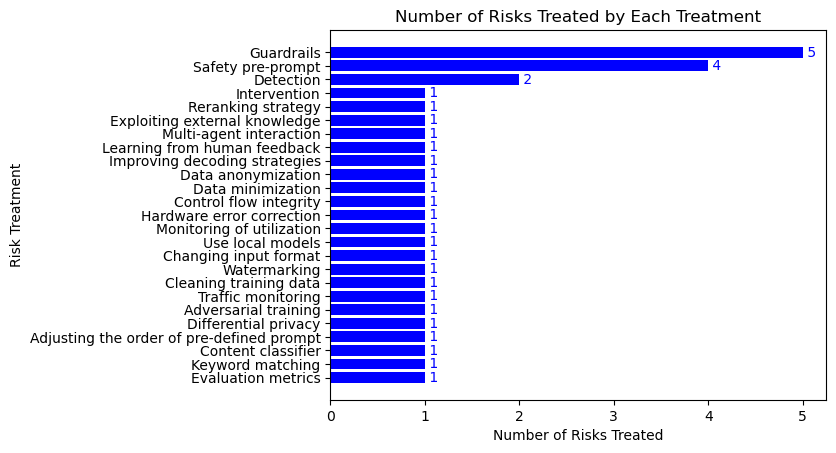

In [15]:
# Plot a histogram to show the treatment that tackles the most risks

import matplotlib.pyplot as plt

# Sort the list in descending order of RiskCount
QUERY_TREATMENT.sort(key=lambda x: x['RiskCount'], reverse=True)

# Get the treatments and their counts
treatments = [item['Treatment'] for item in QUERY_TREATMENT]
counts = [item['RiskCount'] for item in QUERY_TREATMENT]

# Create a bar chart
plt.barh(treatments, counts, color='blue')

# Label the bars with their counts
for i, v in enumerate(counts):
    plt.text(v, i, " "+str(v), color='blue', va='center')

plt.xlabel('Number of Risks Treated')
plt.ylabel('Risk Treatment')
plt.title('Number of Risks Treated by Each Treatment')
plt.gca().invert_yaxis()  # invert the y-axis to have the treatment with the most risks at the top
plt.show()

Research question 5 is stated as follows: 

What is the most effective risk treatment in terms of its ability to modify the impact or/and probability of a risk? 

The 'MODIFIES' relationship which records 'I_effect' and  'P_effect' between a Treatment and Risk will be used to determine the effectiveness of a Treatment. 

In [16]:
# Generate query to Knowledge Graph that returns the values
# for the properties I_effect and P_effect of each MODIFIES
# relationship between Treatment and Risk

QUERY_MODIFIES = kg.query("""
  MATCH (r:Risk)<-[m:MODIFIES]-(t:Treatment) 
  RETURN t.Name AS Treatment, m.I_effect AS Impact_effect, m.P_effect AS Probability_effect, r.Name AS Risk
""")


In [17]:
# Verify the values for QUERY_MODIFIES

QUERY_MODIFIES

[{'Treatment': 'Detection',
  'Impact_effect': 'high',
  'Probability_effect': 'moderate',
  'Risk': 'Harmful content'},
 {'Treatment': 'Intervention',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Harmful content'},
 {'Treatment': 'Reranking strategy',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Exploiting external knowledge',
  'Impact_effect': 'high',
  'Probability_effect': 'high',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Multi-agent interaction',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Detection',
  'Impact_effect': 'high',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Learning from human feedback',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Improving decoding strate

In [18]:
# Changes the I_effect and P_effect of MODIFIES properties  
# for the relationships between Treatment and Risk
# for the Treatment named Detection

CHANGE_MODIFIES = kg.query("""
MATCH (detection:Treatment {Name:'Detection'})-[r:MODIFIES]->(risk:Risk)
SET r.I_effect = 'high'
""")

In [19]:
# Changes the I_effect and P_effect of MODIFIES properties  
# for the relationships between Treatment and Risk
# for the Treatment named Exploiting external knowledge

CHANGE_MODIFIES = kg.query("""
MATCH (extkl: Treatment {Name:'Exploiting external knowledge', LC_Phase:'Plan and Design'})-[r:MODIFIES]->(risk:Risk)
SET r.I_effect = 'high', r.P_effect = 'high'
""")

In [20]:
# Generate query to Knowledge Graph involving the 'MODIFIES' relationship
# after changes to the properties in two of the chosen relationship

QUERY_MODIFIES = kg.query("""
  MATCH (r:Risk)<-[m:MODIFIES]-(t:Treatment) 
  RETURN t.Name AS Treatment, m.I_effect AS Impact_effect, m.P_effect AS Probability_effect, r.Name AS Risk
""")

QUERY_MODIFIES

[{'Treatment': 'Detection',
  'Impact_effect': 'high',
  'Probability_effect': 'moderate',
  'Risk': 'Harmful content'},
 {'Treatment': 'Intervention',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Harmful content'},
 {'Treatment': 'Reranking strategy',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Exploiting external knowledge',
  'Impact_effect': 'high',
  'Probability_effect': 'high',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Multi-agent interaction',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Detection',
  'Impact_effect': 'high',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Learning from human feedback',
  'Impact_effect': 'moderate',
  'Probability_effect': 'moderate',
  'Risk': 'Inaccurate information'},
 {'Treatment': 'Improving decoding strate

In [21]:
# First define a function called calculate_treatment_effect 
# Then list out the calculated treatment_effect for each treatment
# Finally display the treatment with the highest treatment_effect 

def calculate_treatment_effect(impact_value, probability_value):
    effect_matrix = {
        "very high": {"very low": "very low", "low": "low", "moderate": "moderate", "high": "high", "very high": "very high"},
        "high": {"very low": "very low",  "low":  "low",  "moderate":"moderate","high":"high","very high":"very high"},
        "moderate":{"very low":" very low","low":"low","moderate":" moderate","high":" moderate"," very high ":"high"},
        'low':{" very low ":" very low ","low ":"low "," moderate ":"low "," high ":" moderate "," very high":" moderate"},
        ' very low ':{" very low ": " very low","low ":"very low","moderate":"low", "high" : "low", "very high":"low"}
    }


    try:
        treatment_effect = effect_matrix[impact_value][probability_value]
    except KeyError:
        print("Invalid impact or probability value.")
        return None

    return treatment_effect

treatment_definition = {"very low": 1, "low": 2, "moderate": 3, "high": 4, "very high": 5}
highest_treatment_level = "very low"
highest_treatment_items = []

# Calculate risk level for each treatment-risk pair
for item in QUERY_MODIFIES:
    treatment_effect = calculate_treatment_effect(item['Impact_effect'].strip(), item['Probability_effect'].strip())
    print(f"Treatment effectiveness for {item['Treatment']} is {treatment_effect}")
    # Ensure no empty characters before and after the text
    treatment_effect = treatment_effect.strip()
    
    # Check if this risk level is higher than the current highest risk level
    if treatment_definition[treatment_effect] > treatment_definition[highest_treatment_level]:
        highest_treatment_level = treatment_effect
        highest_treatment_items = [item]  # Start a new list with this item
    elif treatment_effect == highest_treatment_level:
        highest_treatment_items.append(item)  # Add to the list of highest risk items

# Print out the combinations of impact and probability value that result in the highest risk level
print("\nThe following combinations of impact effect and probability effect result in the most effective treatment:")
for item in highest_treatment_items:
    print(f"Treatment Name: {item['Treatment']}, Impact Effect: {item['Impact_effect']}, Probability Effect: {item['Probability_effect']}")



Treatment effectiveness for Detection is moderate
Treatment effectiveness for Intervention is  moderate
Treatment effectiveness for Reranking strategy is  moderate
Treatment effectiveness for Exploiting external knowledge is high
Treatment effectiveness for Multi-agent interaction is  moderate
Treatment effectiveness for Detection is moderate
Treatment effectiveness for Learning from human feedback is  moderate
Treatment effectiveness for Improving decoding strategies is  moderate
Treatment effectiveness for Guardrails is  moderate
Treatment effectiveness for Guardrails is  moderate
Treatment effectiveness for Data anonymization is  moderate
Treatment effectiveness for Data minimization is  moderate
Treatment effectiveness for Control flow integrity is  moderate
Treatment effectiveness for Hardware error correction is  moderate
Treatment effectiveness for Monitoring of utilization is  moderate
Treatment effectiveness for Safety pre-prompt is  moderate
Treatment effectiveness for Use lo

End of the code for this project